<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.

#![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
# **Running Your First Notebook**
This notebook will show you how to install the course libraries, create your first Spark cluster, and test basic notebook functionality.  To move through the notebook just run each of the cells.  You will not need to solve any problems to complete this lab.  You can run a cell by pressing "shift-enter", which will compute the current cell and advance to the next cell, or by clicking in a cell and pressing "control-enter", which will compute the current cell and remain in that cell.

** This notebook covers: **
* *Part 1:* Attach class helper library
* *Part 2:* Test Spark functionality
* *Part 3:* Test class helper library
* *Part 4:* Check plotting
* *Part 5:* Check MathJax formulas

#### ** Part 1: Attach and test class helper library **

#### (1a) Install class helper library into your Databricks CE workspace
- The class helper library "spark_mooc_meta" is published in the [PyPI Python Package repository](https://pypi.python.org/pypi) as [https://pypi.python.org/pypi/spark_mooc_meta](https://pypi.python.org/pypi/spark_mooc_meta)
- You can install the library into your workspace following the following instructions:
 - Step 1: Click on "Workspace", then on the dropdown and select "Create" and "Library"

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Library1.png" alt="Drawing" />
 - Step 2 Enter the name of the library by selecting "Upload Python Egg or PyPI" and entering "spark_mooc_meta" in the "PyPI Name" field

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Library2.png" alt="Drawing" />
 - Step 3 Make sure the checkbox for auto-attaching the library to your cluster is selected

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Library3.png" alt="Drawing" />

#### ** Part 1: Test Spark functionality **

** (1a) Create a DataFrame and filter it **

When you run the next cell (with control-enter or shift-enter), you will see the following popup.

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Cluster.png" alt="Drawing" />

Select the click box and then "Launch and Run". The display at the top of your notebook will change to "Pending"

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Cluster_Pending.png" alt="Drawing" />

Note that it may take a few seconds to a few minutes to start your cluster. Once your cluster is running the display will changed to "Attached"

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_Cluster_Attached.png" alt="Drawing" />

Congratulations! You just launched your Spark cluster in the cloud!

In [2]:
# Check that Spark is working
from pyspark.sql import Row
data = [('Alice', 1), ('Bob', 2), ('Bill', 4)]
df = sqlContext.createDataFrame(data, ['name', 'age'])
fil = df.filter(df.age > 3).collect()
print(fil)

# If the Spark job doesn't work properly this will raise an AssertionError
assert fil == [Row(u'Bill', 4)]

[Row(name='Bill', age=4)]


In [6]:
df.head?

** (2b) Loading a text file **

Let's load a text file.

In [9]:
# Check loading data with sqlContext.read.text
import os
baseDir = os.getcwd()
inputPath = 'shakespeare.txt'
fileName = os.path.join(baseDir, inputPath)

dataDF = sqlContext.read.text(fileName)
shakespeareCount = dataDF.count()

print(shakespeareCount)

124456


In [12]:
dataDF.head(10)

[Row(value='This is the 100th Etext file presented by Project Gutenberg, and'),
 Row(value='is presented in cooperation with World Library, Inc., from their'),
 Row(value='Library of the Future and Shakespeare CDROMS.  Project Gutenberg'),
 Row(value='often releases Etexts that are NOT placed in the Public Domain!!'),
 Row(value=''),
 Row(value='Shakespeare'),
 Row(value=''),
 Row(value='*This Etext has certain copyright implications you should read!*'),
 Row(value=''),
 Row(value='<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM')]

#### ** Part 3: Test class testing library **

** (3a) Compare with hash **

Run the following cell. If you see an **ImportError**, you should verify that you added the spark_mooc_meta library to your cluster and, if necessary, repeat step (1a).

<img src="http://spark-mooc.github.io/web-assets/images/Lab0_LibraryError.png" alt="Drawing"  style="width: 600px;"/>

** (3b) Compare lists **

#### ** Part 4: Check plotting **

** (3a) Our first plot **

After executing the code cell below, you should see a plot with 50 blue circles.  The circles should start at the bottom left and end at the top right.

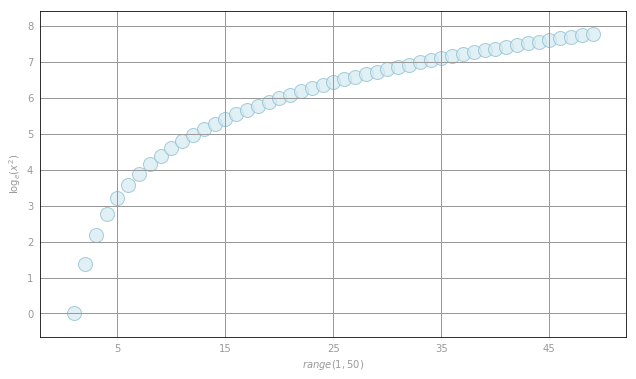

In [13]:
# Check matplotlib plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import log

# function for generating plot layout
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot data
x = range(1, 50)
y = [log(x1 ** 2) for x1 in x]
fig, ax = preparePlot(range(5, 60, 10), range(0, 12, 1))
plt.scatter(x, y, s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel(r'$range(1, 50)$'), ax.set_ylabel(r'$\log_e(x^2)$')
display(fig)
pass

#### ** Part 5: Check MathJax formulas **

** (5a) Gradient descent formula **

You should see a formula on the line below this one: \\[ \scriptsize \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j \,.\\]

This formula is included inline with the text and is \\( \scriptsize (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} \\).

** (5b) Log loss formula **

This formula shows log loss for single point. Log loss is defined as: \\[  \scriptsize \ell_{log}(p, y) = \begin{cases} -\log (p) & \text{if } y = 1 \\\ -\log(1-p) & \text{if } y = 0 \end{cases} \\]

You have completed the lab!

Return to the edX website and proceed with the page for registering with the autograder.